https://archive.ics.uci.edu/ml/datasets.html?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table

https://mubaris.com/posts/linear-regression/

In [207]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

In [208]:
data = pd.read_excel('energy_data.xlsx')

In [211]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [215]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(data)

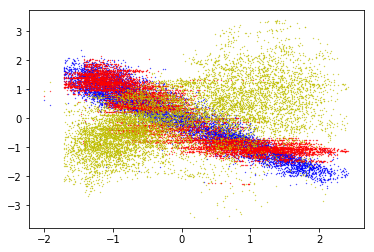

In [221]:
plt.scatter(data[:,-1],data[:,0],s=0.1,c='b')
plt.scatter(data[:,-1],data[:,1],s=0.1,c='r')
plt.scatter(data[:,-1],data[:,2],s=0.1,c='y')
# plt.scatter(data[:,-1],data[:,3],s=0.1,c='g')


# #unscaled data
# plt.scatter(data["PE"],data["AT"],s=0.1,c='b')
# plt.scatter(data["PE"],data["AP"],s=0.1,c='r')


In [217]:
data

array([[-0.62951938, -0.98729659,  1.8204884 , -0.00951935,  0.52120807],
       [ 0.74190911,  0.68104512,  1.1418628 , -0.97462052, -0.58566442],
       [-1.95129733, -1.17301765, -0.18507756,  1.2898397 ,  2.00367889],
       ...,
       [ 1.56583973,  1.57581141, -0.05709854, -2.52261812, -1.45288056],
       [ 0.64797565,  1.19177803,  0.1011913 , -0.74790051, -1.09134518],
       [ 0.26150656,  0.64641916,  0.66867722, -0.37254534, -0.06357687]])

# Common Code

In [231]:
pred = lambda x,theta: x.dot(theta)

def standardize(x,x_v):
    n = x-x_v.mean()
    return(n/x_v.std())

def ols(x,y):

    y_ = y.mean()
    x_ = x.mean()

    b1 = np.sum((y-y_)*(x-x_))/np.sum((x-x_)**2)
    b0 = y_- b1*x_
    return(b0,b1)

def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J


def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)

    r2 = 1-(ssr/sst)
    return(r2)

# Batch Gradient Descent Optimizer

In [222]:
##create a nodel to estimate the relationship b/w x and y
##optimization model = OLS estimator

def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        #print(iteration)
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history



In [225]:
np.random.shuffle(data)

m = 7000
f = 2


X_train = data[:m,:f]
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]

y_train = data[:m,-1]


X_test = data[m:,:f]
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]

y_test = data[m:,-1]

# Initial Coefficients
B = np.zeros(X_train.shape[1])

alpha = 0.005
iter_ = 2000

newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_)

In [175]:
X_train.shape

(5000, 5)

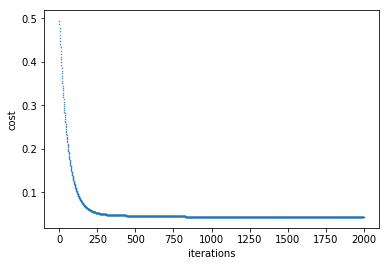

In [226]:
plt.xlabel('iterations')
plt.ylabel('cost')

plt.scatter(np.arange(iter_),cost_history,s=0.2)

In [227]:
y_ = pred(X_test,newB)

r2(y_,y_test)

0.9107375686332629

In [235]:
# ##Testing single samples

# ans_ = pred(X_test[3],newB)

# standardize(ans_,y_train)

help(sc.inverse_transform)

Help on method inverse_transform in module sklearn.preprocessing.data:

inverse_transform(X, copy=None) method of sklearn.preprocessing.data.StandardScaler instance
    Scale back the data to the original representation
    
    Parameters
    ----------
    X : array-like, shape [n_samples, n_features]
        The data used to scale along the features axis.
    copy : bool, optional (default: None)
        Copy the input X or not.
    
    Returns
    -------
    X_tr : array-like, shape [n_samples, n_features]
        Transformed array.



# Using Statmodels

In [236]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])


X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

ModuleNotFoundError: No module named 'statsmodels'

# Sklearn Approach(easy)

In [ ]:
X_train = data.iloc[:8000,0:4].values
y_train = data.PE.iloc[:8000].values.reshape(8000,1)


X_test = data.iloc[8000:,0:4].values
y_test = data.PE.iloc[8000:].values.reshape(data.shape[0]-8000,1)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

In [ ]:
model.intercept_

In [ ]:
model.coef_

In [ ]:
rmse = np.sqrt(np.sum((model.predict(X_test)-y_test)**2)/len(y_test))